In [1]:
import LowLevelFEM as FEM
using LowLevelFEM

gmsh.initialize();

In [2]:
gmsh.open("lapos-acel-2.geo")

mat1 = FEM.material("beam", E=2e5, ν=0.3)
problem = FEM.Problem([mat1], type="Solid", bandwidth="none")

Info    : Reading 'lapos-acel-2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00106823s, CPU 0.00107s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 20%] Meshing surface 2 (Transfinite)
Info    : [ 40%] Meshing surface 3 (Transfinite)
Info    : [ 60%] Meshing surface 4 (Transfinite)
Info    : [ 70%] Meshing surface 5 (Transfinite)
Info    : [ 90%] Meshing surface 6 (Transfinite)
Info    : Done meshing 2D (Wall 0.00332073s, CPU 0.003319s)
Info    : Meshin

LowLevelFEM.Problem("lapos-acel-2", "Solid", 3, [("beam", 200000.0, 0.3, 7.85e-9)], 1.0, 24924)

In [3]:
#gmsh.fltk.run()

In [4]:
function Fx(x, y, z)
    ξ = x - 1.5
    η = y - 15
    φ = atan(η, ξ)
    r = √(ξ^2 + η^2)
    return -r * sin(φ) * 0.01
end

function Fy(x, y, z)
    ξ = x - 1.5
    η = y - 15
    φ = atan(η, ξ)
    r = √(ξ^2 + η^2)
    return r * cos(φ) * 0.01
end

Fy (generic function with 1 method)

In [5]:
supp = FEM.displacementConstraint("supp", ux=0, uy=0, uz=0)
load = FEM.displacementConstraint("load", ux=Fx, uy=Fy)
load0 = FEM.load("load", fx=0);

In [6]:
K = FEM.stiffnessMatrix(problem)

74772×74772 SparseArrays.SparseMatrixCSC{Float64, Int64} with 4918486 stored entries:
⎡⣿⣿⡛⠛⠛⠛⠛⠛⠛⠒⢺⠦⠤⠤⠤⣤⣤⣤⣤⣬⣿⣿⡿⠿⠿⠿⠿⠿⠿⠿⣿⣿⣿⣿⣿⣷⣶⣶⣶⣾⎤
⎢⣿⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠈⠙⠳⢦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠈⠙⠳⢦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠳⢦⣄⡀⠀⠀⠀⠀⠀⎥
⎢⢻⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠳⢦⣄⡀⠀⎥
⎢⠺⡖⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⣿⠲⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠓⎥
⎢⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⡏⡇⠀⠈⠙⠲⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⣇⡇⠀⠀⠀⠀⠀⠈⠙⠲⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠲⢤⣀⠀⠀⠀⠀⎥
⎢⡀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⣸⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠲⢤⣀⎥
⎢⣿⣿⡛⠛⠛⠛⠛⠛⠛⠛⢻⡛⠯⠭⠭⠽⠶⠶⠶⠾⣿⣿⡛⠻⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⎥
⎢⣿⡏⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⠀⣿⡈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⡇⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⠀⣿⡇⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⡇⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⠀⣿⡇⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⡇⠀⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⠀⣿⡇⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⠀⠀⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⠀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⣿⣿⠀⠀⠀⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⠀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⢿⣿⠀⠀⠀⠀⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⢸⣿⠀⠀⠀⠀⠀⠀⠈⢷⡀⠀⠀⠀⠀⠀⠀⠀⢳⡀⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⣸⣿⠀⠀⠀⠀⠀⠀⠀⠈⢷⠀⠀⠀⠀⠀⠀⠀⠀⢳⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [7]:
f = FEM.loadVector(problem, [load0]);

In [8]:
FEM.applyBoundaryConditions!(problem, K, f, [supp, load]);

In [9]:
q = FEM.solveDisplacement(K, f)
S = FEM.solveStress(problem, q);

In [10]:
u = FEM.showDoFResults(problem, q, "uvec", name="uvec", visible=true)
ux = FEM.showDoFResults(problem, q, "ux", name="ux", visible=false)
uy = FEM.showDoFResults(problem, q, "uy", name="uy", visible=false)
uz = FEM.showDoFResults(problem, q, "uz", name="uz", visible=false)

#s = FEM.showStressResults(problem, S, "s", name="σ", visible=true, smooth=false)
#ss = FEM.showStressResults(problem, S, "s", name="σ smooth", visible=false, smooth=true)
sx = FEM.showStressResults(problem, S, "sx", name="σx", visible=false, smooth=true)
sy = FEM.showStressResults(problem, S, "sy", name="σy", visible=false, smooth=true)
sz = FEM.showStressResults(problem, S, "sz", name="σz", visible=false, smooth=true)
sxy = FEM.showStressResults(problem, S, "sxy", name="τxy", visible=false, smooth=true)
syz = FEM.showStressResults(problem, S, "syz", name="τyz", visible=false, smooth=true)
szx = FEM.showStressResults(problem, S, "szx", name="τzx", visible=false, smooth=true)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


10

In [11]:
p1, xy = FEM.plotOnPath(problem, "path", syz, 100, name="τyz", plot=true, visible=false);
FEM.plotOnPath(problem, "path1", syz, 100, name="τyz1", visible=false);
FEM.plotOnPath(problem, "path2", syz, 100, name="τyz2", visible=false);

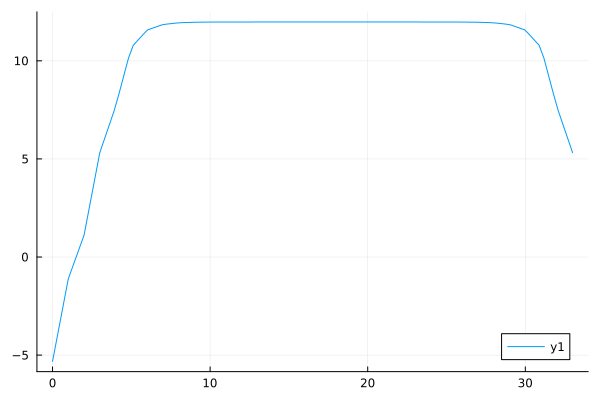

In [12]:
using Plots
plot(xy)

In [13]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XOpenIM() failed
XRequest.18: BadValue 0x0


In [14]:
gmsh.finalize()